# Task 1 - Finding Stationary and Non-Stationary Pair of Stocks

Importing required libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts
%matplotlib inline

Downloading data for 2 firms - Apple and Microsoft, from 1st January 2023 to 25th May 2023.

In [2]:
apple = yf.download('AAPL', start='2023-01-01', end='2023-05-25')
microsoft = yf.download('MSFT', start='2023-01-01', end='2023-05-25')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Plotting the Close Price of both the stocks for the entire time duration

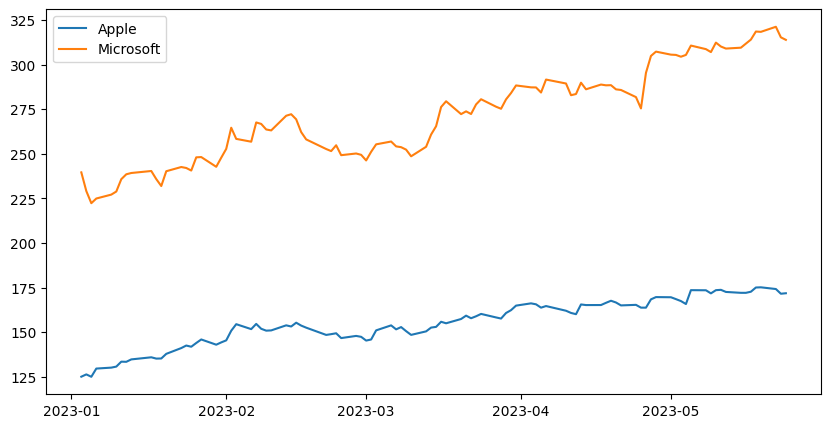

In [3]:
plt.figure(figsize=(10,5))
plt.plot(apple.index, apple['Close'], label='Apple')
plt.plot(microsoft.index, microsoft['Close'], label='Microsoft') 
plt.legend()

Plotting the price of Microsoft vs Apple for the entire time duration.

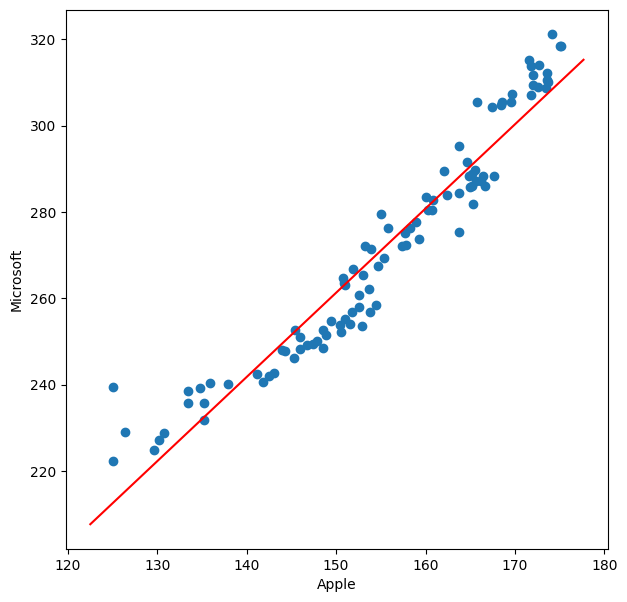

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(apple['Close'], microsoft['Close'])
plt.xlabel('Apple')
plt.ylabel('Microsoft')

slope, intercept = np.polyfit(apple['Close'], microsoft['Close'], 1)
x_axes = np.array(plt.gca().get_xlim())
plt.plot(x_axes, intercept + x_axes * slope, color='red')

We see that the best fit line fits the data decently well, so the chances of the ratio being a stationary series is quite high. We now use the ADF test to check whether it is a stationary time series.


Statistics analysis

Statistic Test :  -3.9278387018279948
p-value :  0.0018392586756579364
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


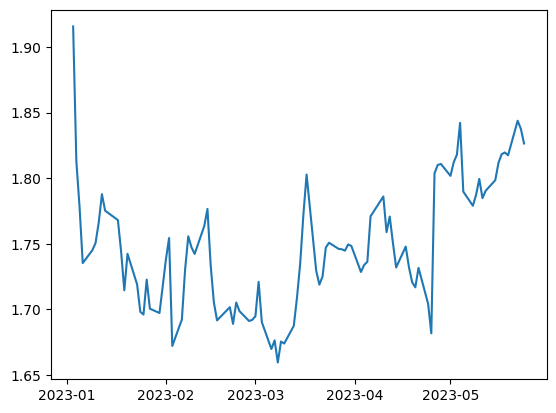

In [5]:
series = microsoft['Close'] / apple['Close']
plt.plot(series.index, series)
adf = ts.adfuller(series)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -3.7534058870869202
p-value :  0.003421673656039386
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


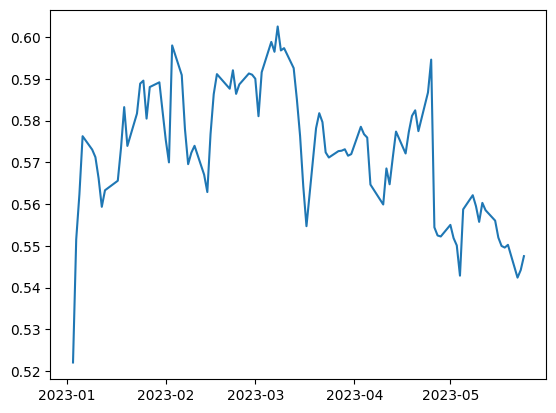

In [6]:
series = apple['Close'] / microsoft['Close']
plt.plot(series.index, series)
adf = ts.adfuller(series)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")

Since the p-values of both ratios are 0.001 and 0.003 (< 0.05), we can conclude that this is indeed a stationary series. It can also be observed by the graph, the mean roughly remains the same.

Now we will check two stocks for non-stationary series:

In [7]:
amd = yf.download('AMD', start='2023-01-01', end='2023-05-25')
intel = yf.download('INTC', start='2023-01-01', end='2023-05-25')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


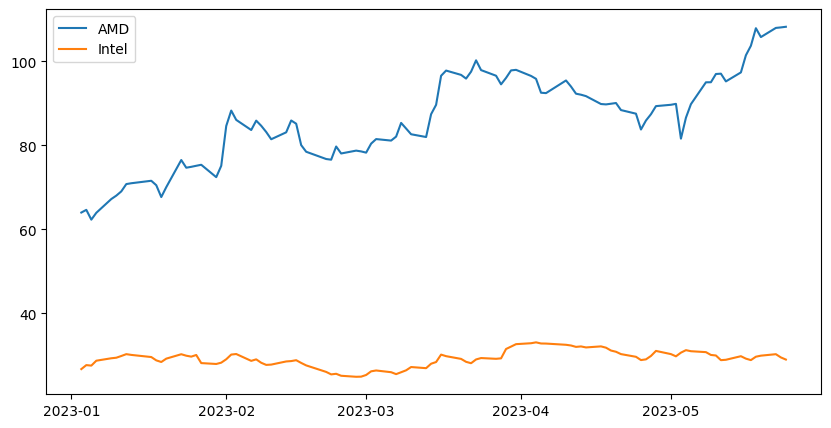

In [8]:

plt.figure(figsize=(10,5))
plt.plot(amd.index, amd['Close'], label='AMD')
plt.plot(intel.index, intel['Close'], label='Intel')
plt.legend()

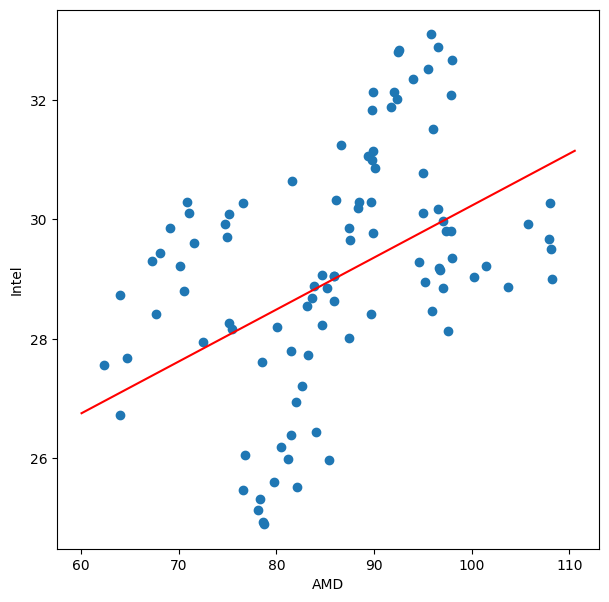

In [9]:

plt.figure(figsize=(7,7))
plt.scatter(amd['Close'], intel['Close'])
plt.xlabel('AMD')
plt.ylabel('Intel')

slope, intercept = np.polyfit(amd['Adj Close'], intel['Adj Close'], 1)
x_axes = np.array(plt.gca().get_xlim())
plt.plot(x_axes, intercept + x_axes * slope, color='red')

The best fit line too is not very accurate, given the data's non linearity


Statistics analysis

Statistic Test :  -1.1733084862623044
p-value :  0.6849710714190119
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


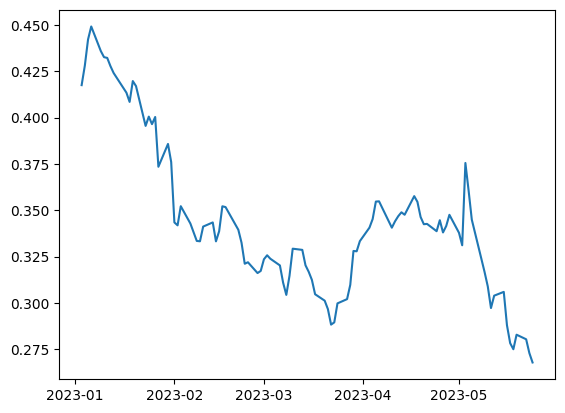

In [10]:
series = intel['Close']/ amd['Close']
plt.plot(series.index, series)
adf = ts.adfuller(series)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -0.7213404307705046
p-value :  0.8411441818478671
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


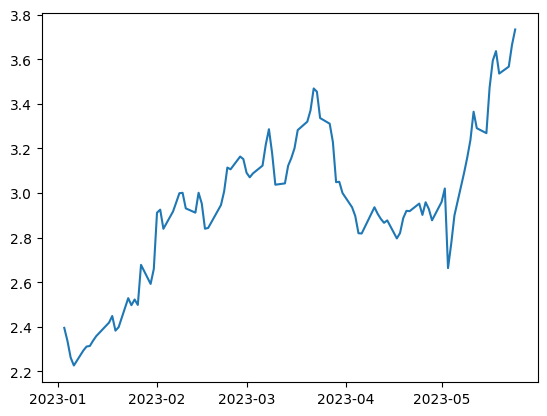

In [11]:

series = amd['Close']/ intel['Close']
plt.plot(series.index, series)
adf = ts.adfuller(series)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")

The p-value of ADF tests are 0.68 and 0.84, which is very high. This indicates that this series is non-stationary.

# Task 2 - Plotting Z-score of ratios of the 2 pairs of stocks

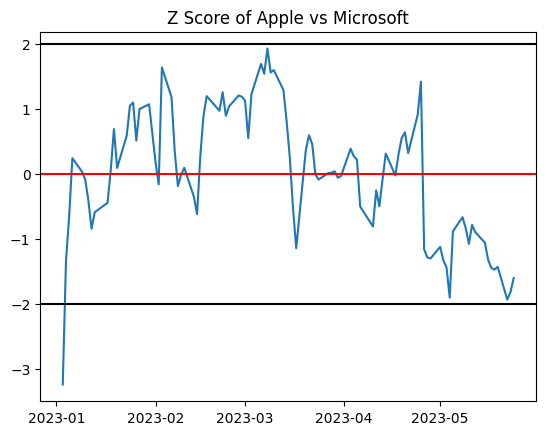

In [12]:
ratio_1 = apple['Close'] / microsoft['Close']
z_score_1 = (ratio_1 - ratio_1.mean()) / ratio_1.std()

plt.title('Z Score of Apple vs Microsoft')
plt.plot(z_score_1.index, z_score_1)
plt.axhline(y = z_score_1.mean(), color='red')
plt.axhline(y = z_score_1.mean() + 2 * z_score_1.std(), color='black')
plt.axhline(y = z_score_1.mean() - 2 * z_score_1.std(), color='black')

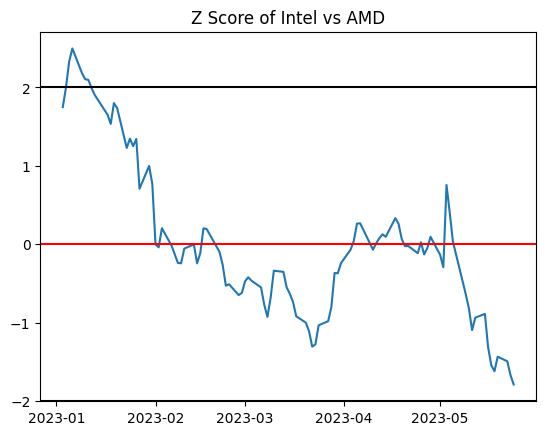

In [13]:

ratio_2 = intel['Close'] / amd['Close']
z_score_2 = (ratio_2 - ratio_2.mean()) / ratio_2.std()

plt.title('Z Score of Intel vs AMD')
plt.plot(z_score_2.index, z_score_2)
plt.axhline(y = z_score_2.mean(), color='red')
plt.axhline(y = z_score_2.mean() + 2 * z_score_2.std(), color='black')
plt.axhline(y = z_score_2.mean() - 2 * z_score_2.std(), color='black')

# Task 3 - Sharpe Ratio of Apple

[*********************100%***********************]  1 of 1 completed
Volatility = 0.26364312838080894
Sharpe Ratio = 1.8432912125394045


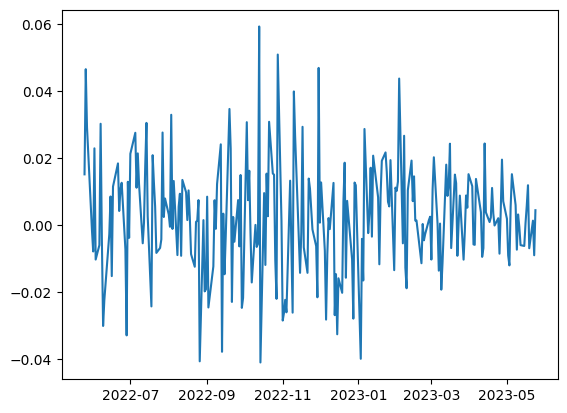

In [14]:
stock = yf.download('AAPL', start='2022-05-25', end='2023-05-25')

daily_returns = (stock['Close'] - stock['Open']) / stock['Open']
risk_free_rate = 3/100
volatility = daily_returns.std() * np.sqrt(252)
print("Volatility = {}".format(volatility))

sharpe_ratio = (daily_returns.mean() * 252 - risk_free_rate) / volatility
print("Sharpe Ratio = {}".format(sharpe_ratio))

plt.plot(daily_returns)

# Task 4 - Golden Cross and Death Cross

Getting data for 2021 - 2023:

In [15]:
stock = yf.download('AAPL', start='2021-05-25', end='2023-05-25')

[*********************100%***********************]  1 of 1 completed


Plotting the moving averages

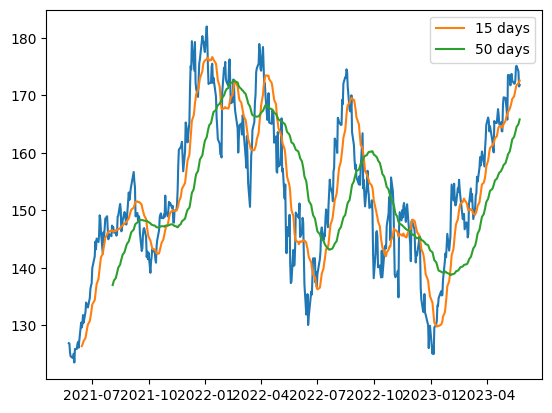

In [16]:
SMA_15 = stock['Close'].rolling(15).mean()
SMA_50 = stock['Close'].rolling(50).mean()

plt.plot(stock.index, stock['Close'])
plt.plot(SMA_15.index, SMA_15, label='15 days')
plt.plot(SMA_50.index, SMA_50, label='50 days')
plt.legend()

Plotting points of intersection of the 2 moving averages

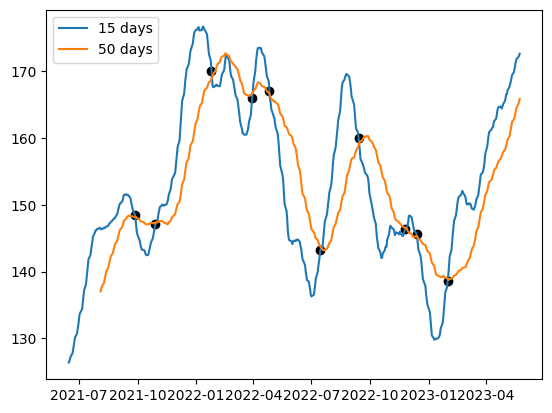

In [17]:
intersection_points = np.argwhere(np.diff(np.sign(SMA_50 - SMA_15))).flatten()[49:] # remove first 49 elements because the moving avg does not exist
plt.plot(SMA_15.index, SMA_15, label='15 days')
plt.plot(SMA_50.index, SMA_50, label='50 days')
plt.scatter(stock['Close'].index[intersection_points], SMA_15[intersection_points], color='black')
plt.legend()

The first intersection point is a death cross, because the 15 day moving average becomes lower than the 50 day moving average. Then, golden crosses and death crosses will alternate.

Let us show the golden cross by green color and death cross by red color

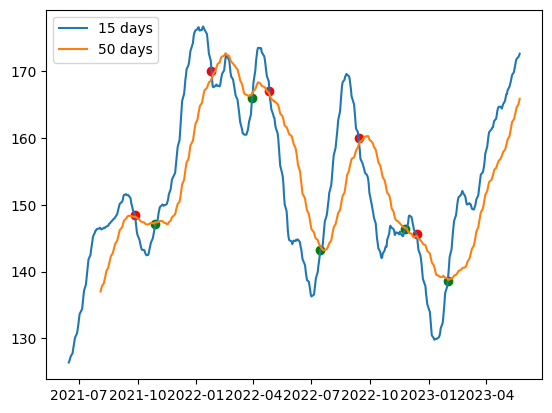

In [18]:
golden_cross = intersection_points[1::2]
death_cross = intersection_points[::2]
plt.plot(SMA_15.index, SMA_15, label='15 days')
plt.plot(SMA_50.index, SMA_50, label='50 days')
plt.scatter(stock['Close'].index[golden_cross], SMA_15[golden_cross], color='green')
plt.scatter(stock['Close'].index[death_cross], SMA_15[death_cross], color='red')
plt.legend()